# f(x) = (sin(x)/2 + cos(x)/2) ** 2 * sin(x)

1. Определить корни
2. Найти интервалы, на которых функция возрастает
3. Найти интервалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки, на котором f > 0
7. Определить промежутки, на котором f < 0

# 1. Определить корни

In [4]:
from sympy import *
x = Symbol('x')

f = (sin(x)/2 + cos(x)/2) ** 2 * sin(x)
roots = solve(f,x)
print(roots)

[0, -pi/4, 3*pi/4, pi]


# 2, 3 Интервалы возрастания и убывания функции

In [5]:
period = periodicity(f, x)
period
period_interval = (-period/2, period/2)
period_interval

(-pi, pi)

# 4. Построить график

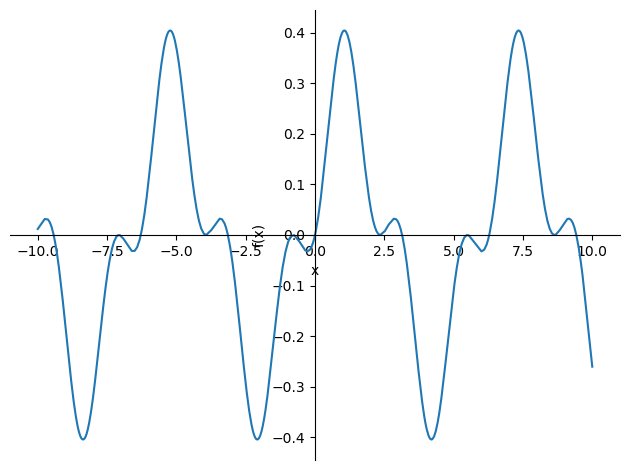

(sin(x)/2 + cos(x)/2)**2*sin(x)


In [6]:
f =  (sin(x)/2 + cos(x)/2) ** 2 * sin(x)
plot(f,(x, -10, 10))
print(f)

# 5. Вычислить вершину

In [ ]:
points = []
for i in diff_f:
    points.append((f.subs(x, i), i))
print(f"Верхняя вершина в коррдинате - {(max(points)[1].evalf(3), max(points)[0].evalf(3))}")
print(f"Нижняя вершина в коррдинате - {(min(points)[1].evalf(3), min(points)[0].evalf(3))}")

# 6, 7 Определить промежутки, на котором f > 0, f < 0

In [7]:
roots = sorted(roots)
roots.insert(0, period_interval[0])
int_symb = []
for i in range(len(roots) - 1):
    if (f.subs(x, (roots[i] + roots[i+1])/2)) > 0:
        int_symb.append("больше нуля")
    else:
        int_symb.append("меньше нуля")
    print(f'На интервале {(roots[i].evalf(3), roots[i+1].evalf(3))} функция {int_symb[-1]}')

На интервале (-3.14, -0.785) функция меньше нуля
На интервале (-0.785, 0) функция меньше нуля
На интервале (0, 2.36) функция больше нуля
На интервале (2.36, 3.14) функция больше нуля
